# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Matsnan Haqqi]
- **Email:** [nanstamofficial@gmail.com]
- **ID Dicoding:** [matsnanha]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 :  Bagaimana tingkat kepadatan penyewaan sepeda pada setiap bulan?
- Pertanyaan 2 : Bagaimana distribusi waktu penyewaan sepeda berdasarkan jam (hour) dalam sehari?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Disini saya hanya menggunakan table hour.csv karena pada sumber aslinya (https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data) dijelaskan bahwa kedua data table hour & day memiliki kesamaan kecuali atribut "hr" tidak ada di table day.

In [2]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/MatsnanHa/Submission/main/data/hour.csv")
hour_df.head()
#Memuat tabel hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [3]:
hour_df.info()
#melihat tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
hour_df.isna().sum()
#memastikan missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
#memeriksa duplikasi


Jumlah duplikasi:  0


In [6]:
hour_df.describe()
#ringkasan parameter statistik

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [7]:
#menghapus kolom instan yang hanya menampilkan urutan data agar memudahkan proses analisis data
drop_col=['instant']
for i in hour_df.columns:
    if i in drop_col:
        hour_df.drop(labels=i, axis=1, inplace=True)

hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
#mengubah judul kolom
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr' : 'hour',
    'weathersit': 'weather_cond',
    'temp': 'temparature',
    'hum' : 'humidity',
    'cnt': 'count'
}, inplace=True)

hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temparature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
hour_df.groupby(by='month').agg({
    'count':['max','min','mean','sum']
})
#pengelompokan data penyewaan sepeda berdasarkan bulan

count                        
        max min        mean     sum
month                              
1       559   1   94.424773  134933
2       610   1  112.865026  151352
3       957   1  155.410726  228920
4       822   1  187.260960  269094
5       873   1  222.907258  331686
6       900   1  240.515278  346342
7       913   1  231.819892  344948
8       941   1  238.097627  351194
9       977   1  240.773138  345991
10      963   1  222.158511  322352
11      729   1  177.335421  254831
12      759   1  142.303439  211036

In [10]:
hour_df.groupby(by='hour').agg({
    'count':['max','min','mean','sum']
})
#pengelompokan data penyewaan sepeda berdasarkan waktu

count                        
       max min        mean     sum
hour                              
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
3       79   1   11.727403    8174
4       28   1    6.352941    4428
5       66   1   19.889819   14261
6      213   1   76.044138   55132
7      596   1  212.064649  154171
8      839   5  359.011004  261001
9      426  14  219.309491  159438
10     539   8  173.668501  126257
11     663  10  208.143054  151320
12     776   3  253.315934  184414
13     760  11  253.661180  184919
14     750  12  240.949246  175652
15     750   7  251.233196  183149
16     783  11  311.983562  227748
17     976  15  461.452055  336860
18     977  23  425.510989  309772
19     743  11  311.523352  226789
20     567  11  226.030220  164550
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941

## Visualization & Explanatory Analysis

### Pertanyaan 1:

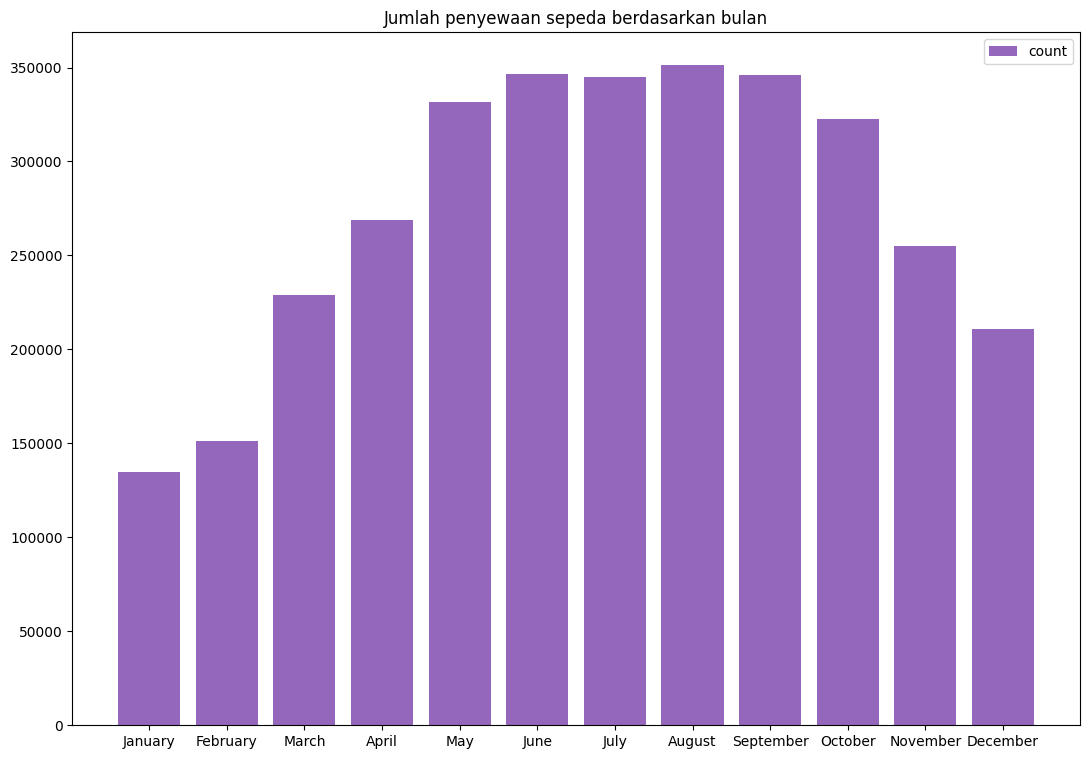

In [11]:
import calendar

# Mengelompokkan data berdasarkan bulan dan menghitung jumlah penyewaan
monthly_usage = hour_df.groupby('month')[['count']].sum().reset_index()

# Mengubah angka bulan menjadi nama bulan
monthly_usage['month'] = monthly_usage['month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(13, 9))

# Membuat bar chart
plt.bar(
    monthly_usage['month'],
    monthly_usage['count'],
    label='count',
    color='tab:purple'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan bulan')
plt.legend()
plt.show()


### Pertanyaan 2:

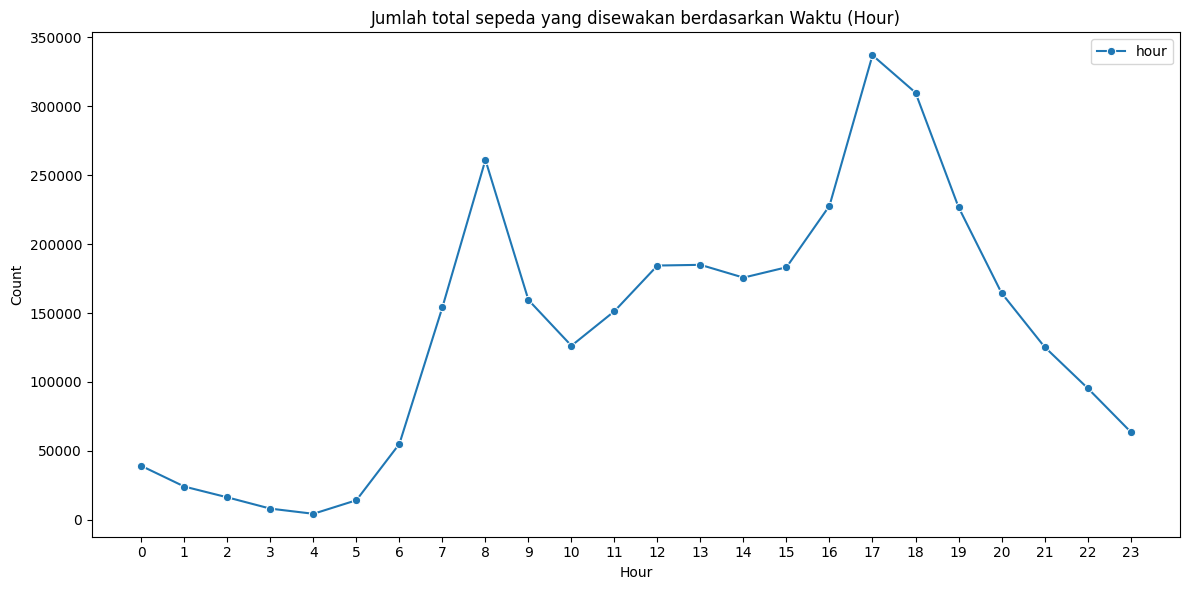

In [12]:

# Grupkan data berdasarkan jam
hour_usage = hour_df.groupby('hour')[['count']].sum().reset_index()

# Atur ukuran gambar dengan figure
plt.figure(figsize=(12, 6))

# Buat line plot menggunakan seaborn
sns.lineplot(
    data=hour_usage,
    x="hour",
    y="count",
    label="hour",
    marker="o"
)

# Tentukan label sumbu x untuk mencakup angka 0-23
plt.xticks(range(24))

# Berikan judul dan label sumbu
plt.title("Jumlah total sepeda yang disewakan berdasarkan Waktu (Hour)")
plt.xlabel("Hour")
plt.ylabel("Count")

# Tampilkan legenda dan plot
plt.legend()
plt.tight_layout()
plt.show()


## Conclusion

- Kesimpulan dari pertanyaan pertama : Bulan Agustus memiliki jumlah penyewaan sepeda tertinggi yakni mencapai 351194 sedangkan bulan Januari memiliki jumlah penyewaan terendah yakni hanya 134933.

- Kesimpulan dari pertanyaan kedua : Jika dilihat berdasarkan jumlah jam (hour) terdapat 336860 pengguna yang menyewa sepeda selama 17 jam sedangkan yang terendah yakni pada angka 4428 yang menyewa sepeda selama 4 jam. Sementara itu pengguna yang menyewa sepeda tidak sampai 1 jam memiliki jumlah pengguna hingga 39130